# Принятие решений в бизнесе

***Цель проекта***

Проанализировать гипоетзы для увеличения выручки 

**Заказчик**

Интернет-магазин



***Описание проекта***

* Необходимо приоритизировать гипотезы из списка гипотез, предоставленных отделом Маркетинга

* Запустить А/В-тесты

* Проанализировать результаты проведенного А/В-тестирования:
   
    1. Остановить тест, зафиксировать победу одной из групп.     
    2. Остановить тест, зафиксировать отсутствие различий между группами.     
    3. Продолжить тест.

***Описание данных***


*    список гипотез (файл `hypothesis.csv`)

`Hypothesis` — краткое описание гипотезы;   
`Reach` — охват пользователей по 10-балльной шкале;   
`Impact` — влияние на пользователей по 10-балльной шкале;   
`Confidence` — уверенность в гипотезе по 10-балльной шкале;    
`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале.   

 
*    информация о заказах пользователей в интернет-магазине (файл `orders.csv.`)    

`transactionId` — идентификатор заказа;    
`visitorId` — идентификатор пользователя, совершившего заказ;    
`date` — дата, когда был совершён заказ;    
`revenue` — выручка заказа;    
`group` — группа A/B-теста, в которую попал заказ.    

 
*    информация о посещениях пользователями интернет-магазина (файл `visitors.csv`)

`date` — дата;   
`group` — группа A/B-теста;    
`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.    
 

***План работы***

- 1. Загрузка данных
- 2. Предобработка данных
- 3. Основной проект:

`Часть 1`:

1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

`Часть 2`:

 1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
 2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
 3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
 4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
 5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
 6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
 7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
 8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
 9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
 10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
 11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
 12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
 13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
 
`Часть 3`:

Примите решение по результатам теста и объясните его. Варианты решений: 
   
 1. Остановить тест, зафиксировать победу одной из групп. 
 2. Остановить тест, зафиксировать отсутствие различий между группами. 
 3. Продолжить тест.
 
- 4. Общий вывод

### Загрузка данных

In [1]:
# загрузка библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
import scipy.stats as stats
import warnings

from scipy import stats as st

In [2]:
# чтение файла csv и сохранение в hypothesis
try:
    hypothesis = pd.read_csv('/Users/irinakuzina/Desktop/hypothesis.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')

# чтение файла csv и сохранение в orders
try:
    orders = pd.read_csv('/Users/irinakuzina/Desktop/orders.csv')
except:
    orders = pd.read_csv('/datasets/orders.csv')
    
# чтение файла csv и сохранение в visitors
try:
    visitors = pd.read_csv('/Users/irinakuzina/Desktop/visitors.csv')
except:
    visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
# Получения первичной информации о датафрейме

def describe (data):
    print('---------Первые 10 строк-----------')
    display(data.head(10))
    print('---------Типы данных---------------\n')
    display(data.info())
    print('---------Статистическая сводка---------------')
    display(data.describe())
    print('---------Пропуски-----------\n')
    display(data.isna().sum())
    print('\n---------Процент пропусков от всего датасета-----------')
    display(
        data.isna().mean().sort_values(ascending=False)*100)
    print('\n---------Дубликаты-----------\n')
    if data.duplicated().sum() > 0:
        print('Дубликатов: ', data.duplicated().sum())
    else:
        print('Дубликатов НЕТ')

In [4]:
describe(hypothesis)

---------Первые 10 строк-----------


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


---------Типы данных---------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


None

---------Статистическая сводка---------------


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


---------Пропуски-----------



Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64


---------Процент пропусков от всего датасета-----------


Hypothesis    0.0
Reach         0.0
Impact        0.0
Confidence    0.0
Efforts       0.0
dtype: float64


---------Дубликаты-----------

Дубликатов НЕТ


In [5]:
pd.options.display.max_colwidth = 100
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Вывод по датафрейму ***hypothesis:***
- Всего 9 строк в датасете
- Название столбцов написаны с загланой буквы, нужно привести к строчным
- Типы данных соответвуют
- Аномалий и выбросов нет
- Без дубликатов и пропусков

In [6]:
describe(orders)

---------Первые 10 строк-----------


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


---------Типы данных---------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

---------Статистическая сводка---------------


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


---------Пропуски-----------



transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


---------Процент пропусков от всего датасета-----------


transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64


---------Дубликаты-----------

Дубликатов НЕТ


Вывод по датафрейму ***orders:***
- Всего 1197 строк в датасете
- В названии столбцов "transactionId" и "visitorId" есть загланой буквы, нужно привести к змеиному регистру
- Типы данных соответвуют, столбец "date" привести к типу datetime
- Аномалий и выбросов нет
- Без дубликатов и пропусков

In [7]:
describe(visitors)

---------Первые 10 строк-----------


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


---------Типы данных---------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

---------Статистическая сводка---------------


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


---------Пропуски-----------



date        0
group       0
visitors    0
dtype: int64


---------Процент пропусков от всего датасета-----------


date        0.0
group       0.0
visitors    0.0
dtype: float64


---------Дубликаты-----------

Дубликатов НЕТ


Вывод по датафрейму ***visitors:***
- Всего 62 строки в датасете
- Типы данных соответвуют, столбец "date" привести к типу datetime
- Аномалий и выбросов нет
- Без дубликатов и пропусков

### Предобработка данных

In [8]:
# приведем название столбцов в датафрейме hypothesis к строчному написанию
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [9]:
# приведем название столбцов в датафрейме orders к к змеиному регистру
orders.columns = orders.columns.str.replace('Id', '_id')
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [10]:
# столбец "date" в датафрейме orders приведем к типу datetime
orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [11]:
# столбец "date" в датафрейме visitors приведем к типу datetime
visitors['date'] = pd.to_datetime(visitors['date'], format = '%Y-%m-%d')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


***Мною данные признаны полными, можно переходить к основному проекту***

### Часть 1
### Приоритизация гипотез

 у отдела маркетинга есть список из 9-ти гипотез, каждый пункт которой оценен по шкале от 0 до 10

***Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета***

In [12]:
# уберем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', None)

In [13]:
#расчитываем ICE = (impact * confidense)/efforts 
hypothesis['ice'] = round((hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts'],2)
hypothesis[['hypothesis','ice']].sort_values(by='ice',ascending = False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


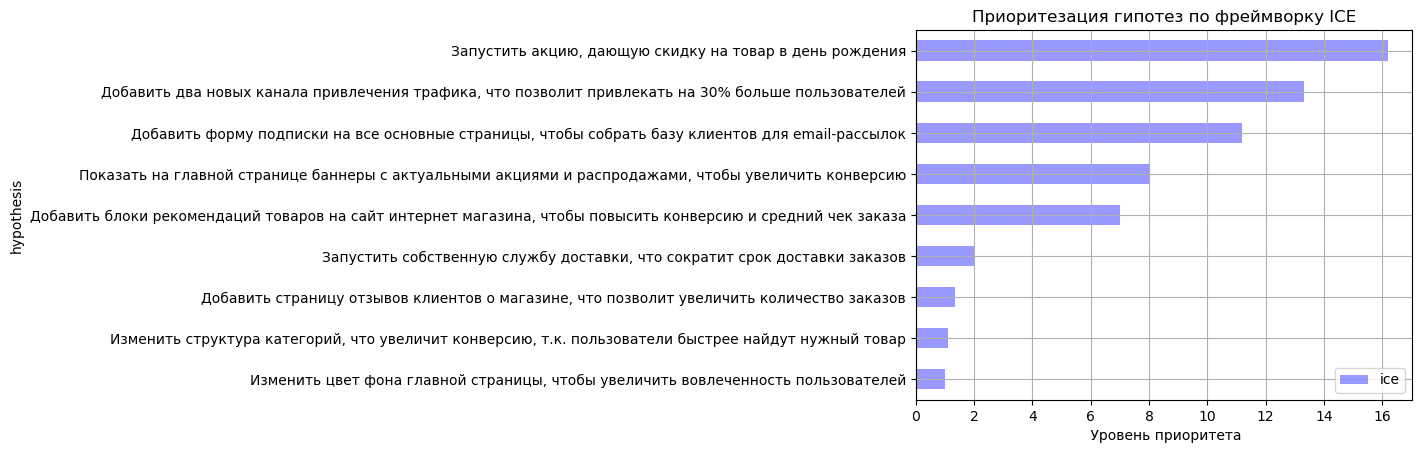

In [14]:
barh= (hypothesis[['hypothesis', 'ice']]
      .set_index('hypothesis')
      .sort_values(by ='ice')
      .plot(kind='barh', color='blue', alpha=0.4)
     )
barh.grid(True)
barh.set_xlabel(' Уровень приоритета')
barh.set_title('Приоритезация гипотез по фреймворку ICE')
plt.show()

***Вывод:***
По фреймворку ICE  выделим ТОП-5 наиболее приоритетных гипотез:
- ***1.Запустить акцию, дающую скидку на товар в день рождения*** - лидер, так как эта акция сильнее всего повлияет на пользователей('impact' = 9) и мы в этом уверены('confidense' = 9)(все любят получать подарки)+стоимсоть сравнительно невысокая ('efforts ' = 5)


- 2.Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 3.Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок 
- 4.Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
- 5.Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

***Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета***

In [15]:
#расчитываем RICE = (reach * impact * confidense)/efforts 
hypothesis['rice'] = round((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts'],2)
hypothesis[['hypothesis','rice']].sort_values(by='rice',ascending = False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


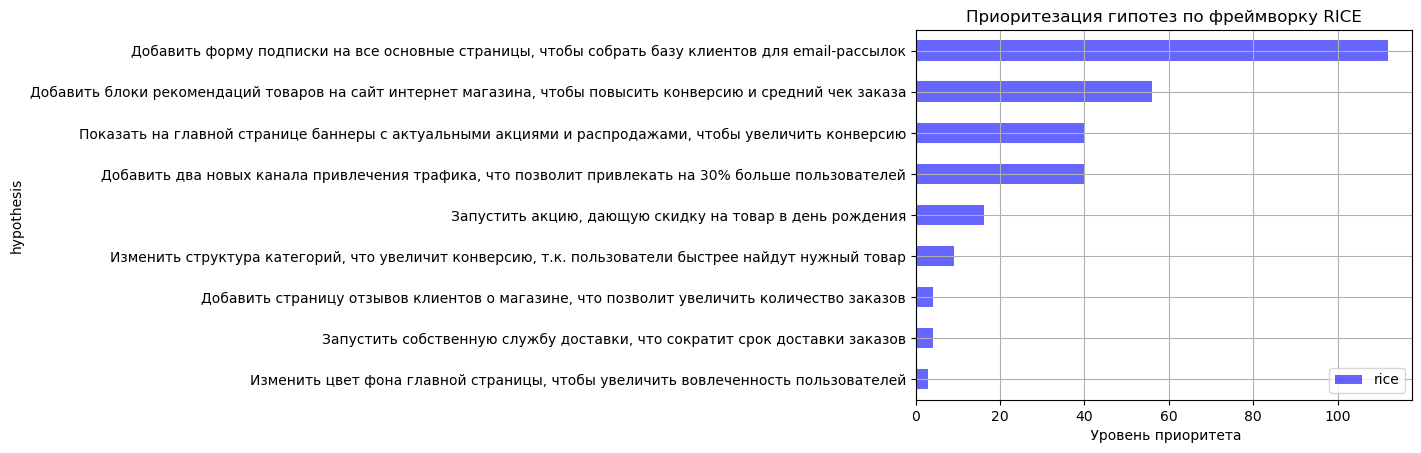

In [16]:
barh= (hypothesis[['hypothesis', 'rice']]
      .set_index('hypothesis')
      .sort_values(by ='rice')
      .plot(kind='barh', color='blue', alpha=0.6)
     )
barh.grid(True)
barh.set_xlabel(' Уровень приоритета')
barh.set_title('Приоритезация гипотез по фреймворку RICE')
plt.show()

***Вывод:***

По фреймворку RICE выделим ТОП-5 наиболее приоритетных гипотез:

- ***1.Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок***-лидер, так имеет самый высокий охват('reach' = 10)
- 2.Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- 3.Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 4.Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
- 5.Запустить акцию, дающую скидку на товар в день рождения	

***Как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло***

In [17]:
hypothesis.sort_values('ice',ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


***Вывод:***
- ТОП-5 наиболее приоритетных гипотез одинаковы как для фреймворка ICE, так и для RICE, но они имеют разных лидеров
- Ключевой момент, который изменил приоритезацию гипотез это пункт "reach" - охват пользователей, которых затронут новые изменения
- У гипотезы 'Запустить акцию, дающую скидку на товар в день рождения' reach = 1, так как в акции можно поучаствовать только 1 раз год, поэтому у данной гипотезы ICE = RICE
- А у гипотезы 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок' reach = 10, так как добавив форму подписки на все основные страницы затронет каждого пользователя, зашедшего на сайт в любое время + impact = 7 и сonfidence = 8, скорее всего основаны на анализе конкурентов, так как введение подписки - популярный способ увеличения положетельного влияние на пользователей диджитал продуктов. Efforts у этих двух гипотез равны

**Для дальнейшего A/B теста я бы остановилась на гипотезе №7: 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'**, так как имеет наивысшую оценку и у компании есть все необходимые ресурсы для проведения дальнейшего теста

### Часть 2 
### Анализ A/B-теста

Чтобы построить графики, нужно собрать кумулятивные(накопленные) данные

In [18]:
#создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date', 'group']].drop_duplicates()
dates_groups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [19]:
#получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = (
dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
.agg({'date': 'max',
      'group': 'max',
      'transaction_id': 'nunique',
      'visitor_id': 'nunique',
      'revenue': 'sum'
        }),
    axis=1).sort_values(by=['date', 'group']))
orders_aggregated 

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [20]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated =(
dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date']<= x['date'], visitors['group'] == x['group'])]
.agg({'date': 'max',
      'group': 'max', 
      'visitors': 'sum'}),
    axis=1).sort_values(by=['date', 'group']))
visitors_aggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [21]:
#объединям полученные таблицы по дате и группе 
cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
#переименум столбцы 
cumulative_data.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulative_data

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


***1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.***

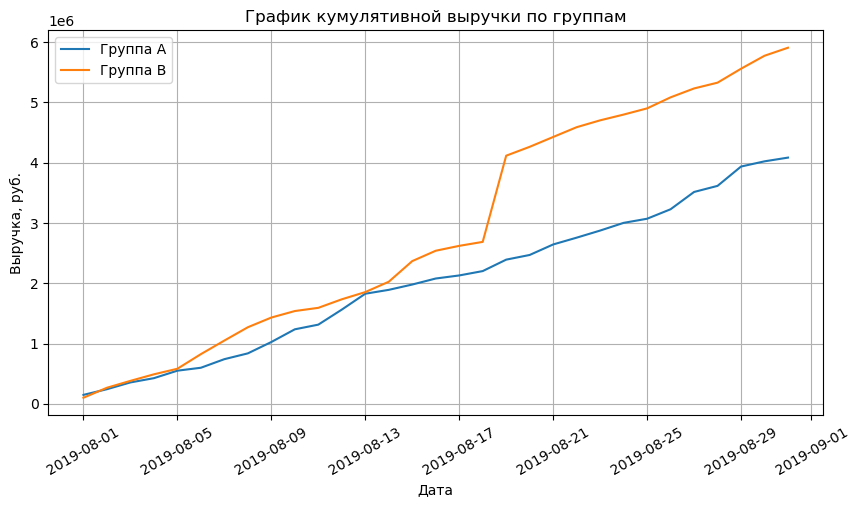

In [22]:
#зададим размеры графика
plt.figure(figsize=(10,5))

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel("Выручка, руб.")
plt.xlabel('Дата')
plt.xticks(rotation=30)
plt.grid(True)
plt.legend(['Группа А', 'Группа B'])
plt.show()

Вывод: 
- Выручка почти равномерно увеличивается в течение всего теста
- Кумулятивная выручка группы А растет линейно, и она меньше, чем у группы В.
- В группе В есть резкий скачок в районе 18.08.2019, что может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке

**Лидер группа В**

***2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.***

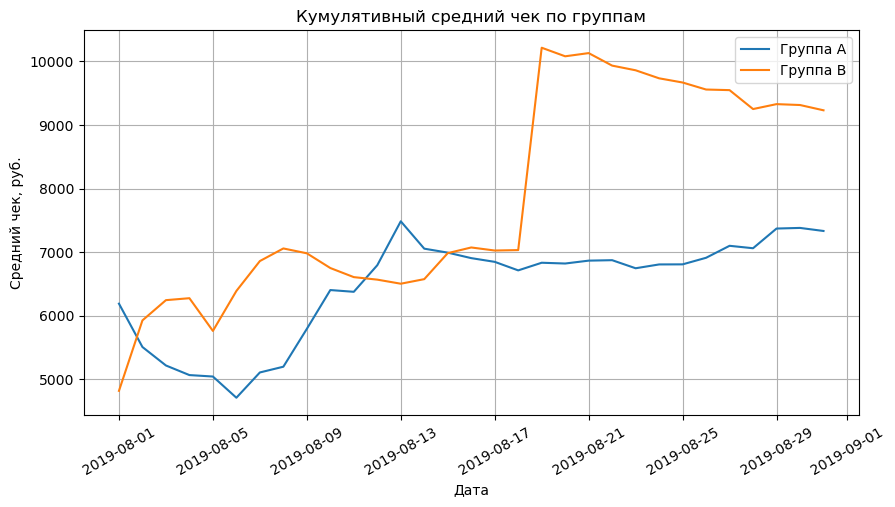

In [23]:
#зададим размеры графика
plt.figure(figsize=(10,5))

#построим графики среднего чека, разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.legend()  

plt.legend(['Группа А', 'Группа B']) 
plt.xlabel('Дата')
plt.ylabel('Средний чек, руб.') 
plt.title('Кумулятивный средний чек по группам')
plt.xticks(rotation=30)
plt.grid(True)
plt.show()  

Вывод:
- Средний чек становится равномерным ближе к концу теста
- Он установился для группы А и продолжает падать для группы В
- Вероятно, в группу В во второй половине теста упали крупные заказы, поэтому нужно больше данных, чтобы прийти к ее реальному среднему чеку 

**Недостаточно данных для определения лидера**

***3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.***

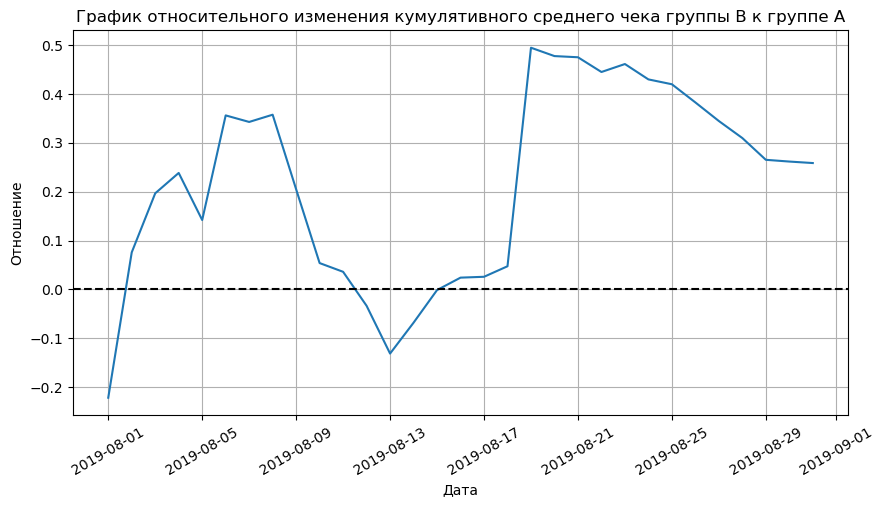

In [24]:
#зададим размеры графика
plt.figure(figsize=(10,5))

# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date',\
                                                       how='left', suffixes=['_a', '_b'])
# cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue['date'],(merged_cumulative_revenue['revenue_b']\
                                            /merged_cumulative_revenue['orders_b'])/
        (merged_cumulative_revenue['revenue_a']/merged_cumulative_revenue['orders_a'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Отношение') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=30)
plt.grid(True)
plt.show()

Вывод:
- В нескольких точках график различия между сегментами резко "скачет"
- В пиковый дни на графике(выше 0-для группы В, ниже 0-для А), были сделаны анамально дорогие заказы

***4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.***

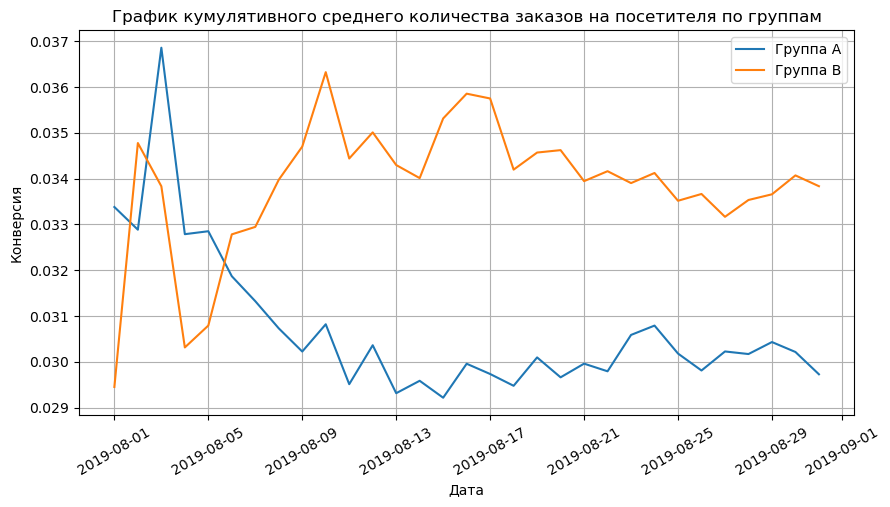

In [25]:
#зададим размеры графика
plt.figure(figsize=(10,5))

#считаем среднее количество заказов на посетителя
cumulative_data['conversion'] =  cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# строим графики
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.legend()
plt.legend(['Группа А', 'Группа B']) 
plt.xlabel('Дата')
plt.ylabel('Конверсия') 
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xticks(rotation=30)
plt.grid(True)
plt.show()

Вывод:
- Группы колебались около одного значения:в первые дни конверся у группы А была выше, чем у В
- После 8 дней с начала теста:
  * конверсия группы А установилась на уровне от 0.029 до 0.031
  * для B - от 0.034 до 0.036

Результат группы В кажется оптимистичнее

**Лидер группа В**

***5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.***

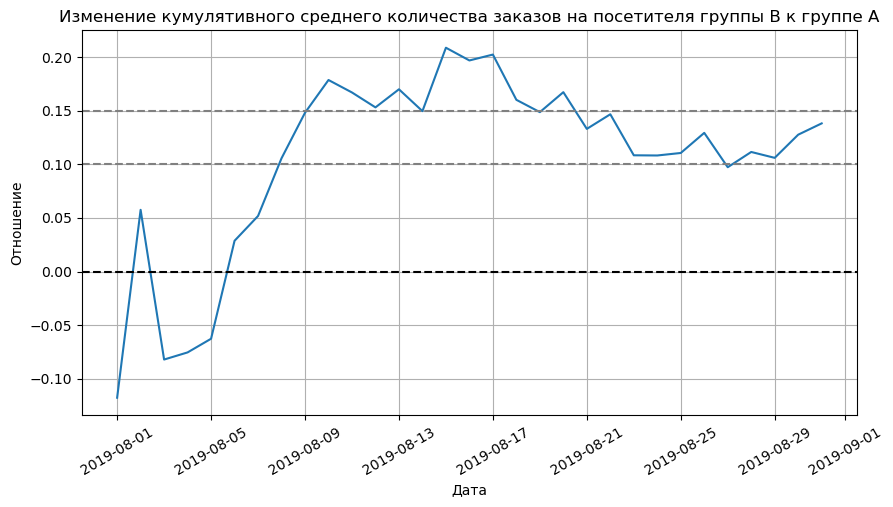

In [26]:
#зададим размеры графика
plt.figure(figsize=(10,5))

# собираем данные в одном датафрейме
merged_cumulative_conversion = cumulative_data_a[['date','conversion']].\
merge(cumulative_data_b[['date','conversion']], left_on='date', right_on='date',\
                                                how='left', suffixes=['_a', '_b'])
# cтроим отношение конверсий
plt.plot(merged_cumulative_conversion['date'],merged_cumulative_conversion['conversion_b']/
         merged_cumulative_conversion['conversion_a']-1)

# добавляем ось X c нулевым приростом и отметку в 10% 
plt.axhline(y=0, color='black', linestyle='--')  
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
# зададим описание графика 
plt.ylabel('Отношение') 
plt.xlabel('Дата') 
plt.title('Изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xticks(rotation=30)
plt.grid(True)
plt.show()

Вывод:
- В начале теста группа B проигрывала группе А, но затем стабильно показала прирост после 6 дня с начала теста и  привысила показатель отношения среднего количества заказов в 20%, стабилизировавшись в пределах от 10 до 15 % к концу периода

**Лидер группа В**


***6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.***

In [27]:
#сгруппируем кол-во заказов для каждого пользователя из датафрейма orders
orders_by_users = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})

#переименуем столбцы
orders_by_users.columns = ['user_id', 'orders']
orders_by_users.sort_values(by='orders', ascending=False) 

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
...,...,...
359,1484903144,1
360,1485964287,1
361,1494664757,1
362,1495112755,1


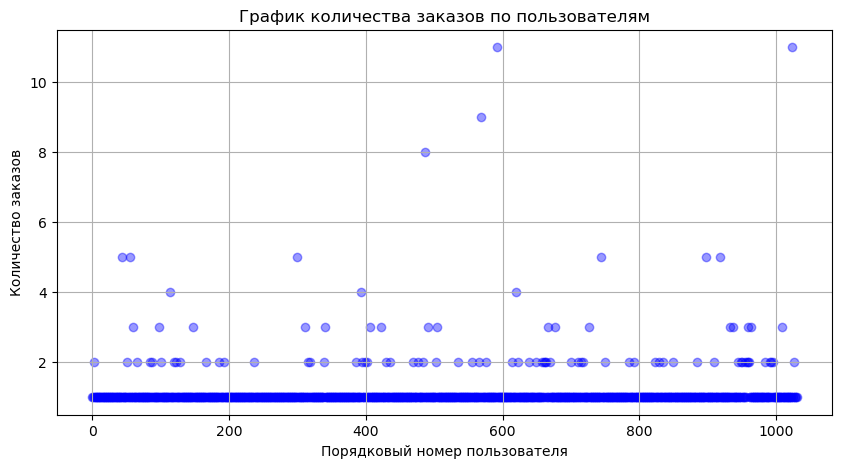

In [28]:
#построим точечный график
# зададим размеры графика  
plt.figure(figsize=(10,5))

# серия из чисел от 0 до количества наблюдений в orders_by_users 
x_values = pd.Series(range(0, len(orders_by_users)))

plt.scatter(x_values, orders_by_users['orders'],color='blue', alpha=0.4)
plt.ylabel('Количество заказов') 
plt.xlabel('Порядковый номер пользователя') 
plt.title('График количества заказов по пользователям') 
plt.grid(True)
plt.show()

Вывод:

- В основном пользователи совершают 1-2 заказа на сайте, реже 4-5
- Есть также пользователи, которые совершили подряд  8,9 и 11 заказов,возможно это аномалии,а возможно это постоянные клиенты, которые активно совершают заказы на сайте

***7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.***

In [29]:
print(np.percentile(orders_by_users['orders'], [95, 99])) 

[2. 4.]


Вывод:

- Не более 5% пользователей совершали более 2 заказов
- Не более 1% пользователей совершали более 4 заказов

Выбираем 3 заказа на одного пользователея за верхнюю границу числа заказов и отсеим аномальных пользователей по ней

***8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.***

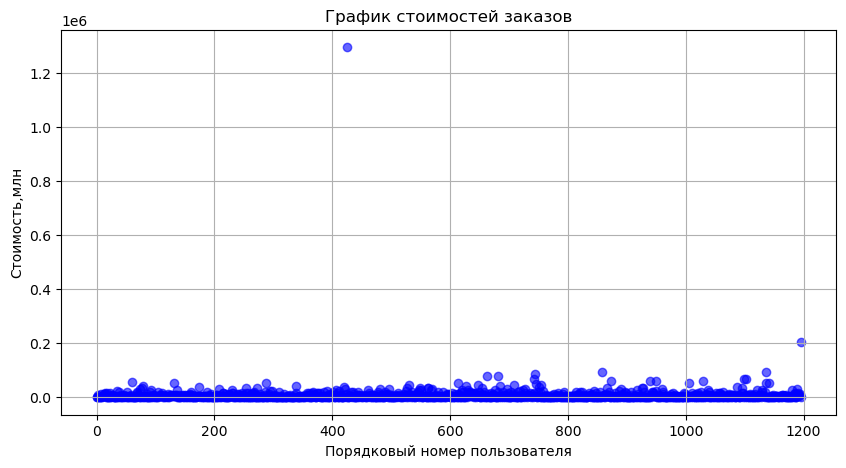

In [30]:
#построим точечный график
# зададим размеры графика  
plt.figure(figsize=(10,5))

# серия из чисел от 0 до количества наблюдений в orders 
x_values = pd.Series(range(0, len(orders)))

plt.scatter(x_values, orders['revenue'],color='blue', alpha=0.6)
plt.ylabel('Стоимость,млн') 
plt.xlabel('Порядковый номер пользователя') 
plt.title('График стоимостей заказов') 
plt.grid(True)
plt.show() 

In [31]:
#оценим табличные значения
orders[['visitor_id', 'revenue']].sort_values(by='revenue', ascending=False)

,visitor_id,revenue
425,1920142716,1294500
1196,2108080724,202740
858,1316129916,93940
1136,1307669133,92550
744,888512513,86620
...,...,...
933,3577713868,60
459,2738601405,50
756,3423937755,50
584,2705308997,50


Вывод: 

- Есть 2 крупных заказа на 1,3 млн и на 200 тысяч, видимо они и вызвали пиковые показатели при анализе кумулятивного среднего чека по группам

Построим новый точечный график без 2х выбросов, посатвим ограничение в 100 тысяч

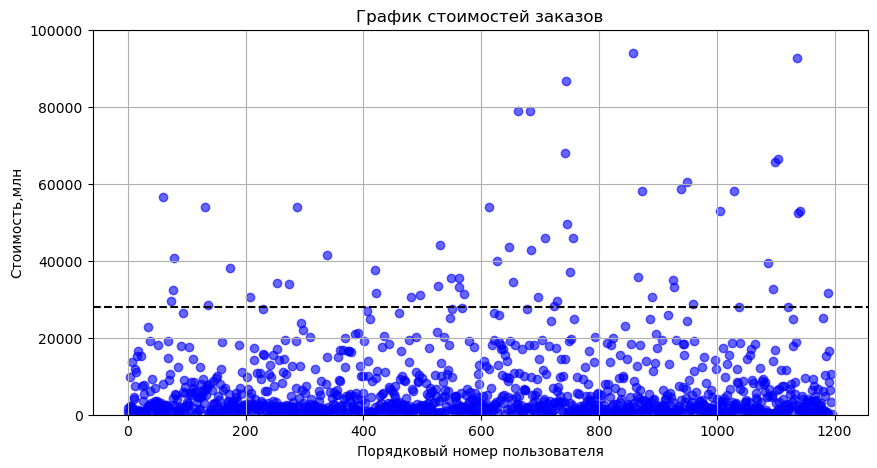

In [32]:
#построим точечный график
# зададим размеры графика  
plt.figure(figsize=(10,5))

# серия из чисел от 0 до количества наблюдений в orders 
x_values = pd.Series(range(0, len(orders)))

plt.scatter(x_values, orders['revenue'],color='blue', alpha=0.6)

#ограничим ось у 100000
plt.ylim(0, 100000)
#обозначим границу основной стоимости заказов в 30 тысяч на графике
plt.axhline(y=28000, color='black', linestyle='--')

plt.ylabel('Стоимость,млн') 
plt.xlabel('Порядковый номер пользователя') 
plt.title('График стоимостей заказов') 
plt.grid(True)
plt.show() 

Вывод:

- Основные значения приходятся на диапазон от 0 до 20-30 тысяч, необходимо подсчитать процентили, по результатам которых обозначим на графике границу основной стоимости заказов с помощью "plt.axhline"

***9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.***

In [33]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Вывод:

- Не более 5% заказов были стоимостью более 28 000
- Не более 1% заказов были стоимость более 58 233.2

Установим верхнюю границу основной стоимости заказа в 28 тысяч

***10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.***

Для расчета статистической значимости различий в среднем количестве заказов на посетителя между группами  буду использовать непараметрический тест Манна-Уитни, так как в данных есть выбросы.
Для уровня значимости установим стандартный уровень статистической значимости, равный 0.05.

In [34]:
#подготовка данных

# данные по заказам на каждого пользователя

orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id':'nunique'})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

display(orders_by_users_a.head()) 
display(orders_by_users_b.head())  

,visitor_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


,visitor_id,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


Объявим переменные, в которых пользователям с заказами будет соответствовать число заказов пользователя, пользователям без заказов — нули. 

In [35]:
sample_a = pd.concat([orders_by_users_a['orders'],
           pd.Series(0, 
                     index=np.arange
                     (visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_users_a['orders'])),
                  name='orders')],axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],
           pd.Series(0,
                     index=np.arange(
                     visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_users_b['orders'])),
                   name='orders')],axis=0)

display(sample_a) 
display(sample_b)

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18736, dtype: int64

0        1
1        1
2        1
3        1
4        1
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Name: orders, Length: 18916, dtype: int64

<p>Пропишем основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{различий в среднем количестве заказов на посетителя между группами нет}\\
   H_1 :\text{различия в среднем количестве заказов на посетителя между группами есть}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$

In [36]:
score_1 = stats.mannwhitneyu(sample_a, sample_b)[1] 
#задаим значение aplha
alpha = 0.05

print('Значение p-value: {0:.4f}'.format(score_1))


if score_1 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  

#расчет среднего количества заказов на посетителя 
print('Среднее количество заказов на посетителя группы А: {:.1%}'.format(sample_a.mean()))
print('Среднее количество заказов на посетителя группы B: {:.1%}'.format(sample_b.mean()))

#относительные различия в среднем количестве заказов на посетителя между группами
print('Отношение В к А: {0:.1%}'.format(sample_b.mean()/sample_a.mean()-1))   

Значение p-value: 0.0168
Отвергаем нулевую гипотезу
Среднее количество заказов на посетителя группы А: 3.0%
Среднее количество заказов на посетителя группы B: 3.4%
Отношение В к А: 13.8%


Вывод:

- По "сырым" данным различия в среднем количестве заказов между группами есть.
- р-value = 0.0168 < 0.05 - нулевую гипотезу о том, что 'различий в среднем количестве заказов на посетителя между группами нет' - отвергаем. Относительный выигрыш  группы B = 13.81%.

**Лидер группа В**

***11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.***

<p>Пропишем основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{различий в среднем чеке между группами нет}\\
   H_1 :\text{различия в среднем чеке между группами есть}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$ 



In [37]:
#передадим критерию mannwhitneyu данные о выручке с заказов

score_2 = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]  

#введем значение p-value
print('Значение p-value: {0:.3f}'.format(score_2))

if score_2 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  

#расчет среднего чека по группам
print('Средний чек группы А: {:.2f}'.format(orders[orders['group']=='A']['revenue'].mean()))
print('Средний чек группы B: {:.2f}'.format(orders[orders['group']=='B']['revenue'].mean()))

#относительные различия в среднем чеке между группами
print('Относительный прирост В к А: {:.1%}'.format(orders[orders['group']=='B']['revenue'].mean()
                                            / orders[orders['group']=='A']['revenue'].mean()-1))  

Значение p-value: 0.729
Не получилось отвергнуть нулевую гипотезу
Средний чек группы А: 7333.58
Средний чек группы B: 9230.88
Относительный прирост В к А: 25.9%


Вывод:

- По "сырым" данным различий в среднем чеке между группами нет.
- р-value = 0.729 > 0.05 - нулевую гипотезу о том, что 'различий в среднем чеке между группами нет' - не получилось отвергнуть. Относительный выигрыш  группы B = 25.9%.

**Лидер группа В**

***12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.***

Примем за аномальных пользователей тех, кто совершил от 4 заказов или совершил заказ дороже 30 000. Так мы уберём 1% пользователей с наибольшим числом заказов и от 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 4 — users_with_many_orders и пользователей, совершивших заказы дороже 30 000 — users_with_expensive_orders. Объединим их в таблице abnormal_users.
Узнаем, сколько всего аномальных пользователей методом shape().

In [38]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 4]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > 4]['visitor_id'],
    ],
    axis=0,
)


users_with_expensive_orders = orders[orders['revenue'] > 30000]['visitor_id']


abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormal_users.head(5))
print('Кол-во аномальных пользователей: ', abnormal_users.shape[0])

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
Name: visitor_id, dtype: int64

Кол-во аномальных пользователей:  53


Вывод :

- 53 аномальных пользователей - достаточное количество, чтобы повлиять на результаты теста   

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.

In [39]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

<p>Пропишем основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{различий в среднем количестве заказов на посетителя между группами нет}\\
   H_1 :\text{различия в среднем количестве заказов на посетителя между группами есть}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$

In [40]:
#считаем статистическую значимость различий в среднем количестве заказов на посетителя между группами
#по «очищенным» данным

score_3 = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1] 

print('Значение p-value: {0:.4f}'.format(score_3))


if score_3 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  

#расчет среднего количества заказов на посетителя 
print('Среднее количество "очищенных" заказов на посетителя группы А: {:.1%}'.format(sample_a_filtered.mean()))
print('Среднее количество "очищенных" заказов на посетителя группы B: {:.1%}'.format(sample_b_filtered.mean()))

#относительные различия в среднем количестве заказов на посетителя между группами
print('Отношение В к А: {0:.1%}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))   

Значение p-value: 0.0188
Отвергаем нулевую гипотезу
Среднее количество "очищенных" заказов на посетителя группы А: 2.7%
Среднее количество "очищенных" заказов на посетителя группы B: 3.1%
Отношение В к А: 14.4%


Вывод:

- По "очищенным" данным подтвердилось различия в среднем количестве заказов между группами.
- р-value = 0.0188 < 0.05 - нулевую гипотезу о том, что 'различий в среднем количестве заказов на посетителя между группами нет' - отвергаем. Относительный выигрыш  группы B = 14.4%.

**Лидер группа В**

***13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.***

<p>Пропишем основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{различий в среднем чеке между группами нет}\\
   H_1 :\text{различия в среднем чеке между группами есть}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$ 



In [41]:
#передадим критерию mannwhitneyu 'очищенные' данные о выручке с заказов

score_4 = stats.mannwhitneyu(
orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'])[1]

#введем значение p-value
print('Значение p-value: {0:.3f}'.format(score_4))

if score_2 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  

#расчет среднего чека по группам
print('Средний чек группы А по «очищенным» данным: {:.2f}'.format(orders[np.logical_and(orders['group']=='A',
                                       np.logical_not(orders['visitor_id'].
                                                      isin(abnormal_users)))]['revenue'].mean()))
print('Средний чек группы B по «очищенным» данным: {:.2f}'.format(orders[np.logical_and(orders['group']=='B',
                                       np.logical_not(orders['visitor_id'].
                                                      isin(abnormal_users)))]['revenue'].mean()))

#относительные различия в среднем чеке между группами
print('Относительный прирост В к А: {:.1%}'.format(orders[np.logical_and(orders['group']=='B',
                                       np.logical_not(orders['visitor_id'].
                                                      isin(abnormal_users)))]['revenue'].mean()
                                            / orders[np.logical_and(orders['group']=='A',
                                       np.logical_not(orders['visitor_id'].
                                                      isin(abnormal_users)))]['revenue'].mean()-1))  

Значение p-value: 0.979
Не получилось отвергнуть нулевую гипотезу
Средний чек группы А по «очищенным» данным: 5279.56
Средний чек группы B по «очищенным» данным: 5191.14
Относительный прирост В к А: -1.7%


Вывод:

- По "очищенным" данным различий в среднем чеке между группами нет.
- р-value = 0.979 > 0.05 - нулевую гипотезу о том, что 'различий в среднем чеке между группами нет' - не получилось отвергнуть. Относительный выигрыш  группы A = 1.7%. Абсолютные значения средних чеков практически равны

**Лидер группа A**

### Часть 3
### Примите решение по результатам теста и объясните его

**Имеющиеся факты:**

- Есть стат.значимое различие по среднему количеству заказов на посетителя между группами как для "сырых", так и для "очищенных" данных

- Нет стат.значимого различия по среднему чеку между группами как для "сырых", так и для "очищенных" данных

- График различия среднего количества заказов (конверсии) между группами сообщает, что результаты группы В стабильно лучше, чем группы А и есть тенденции к росту 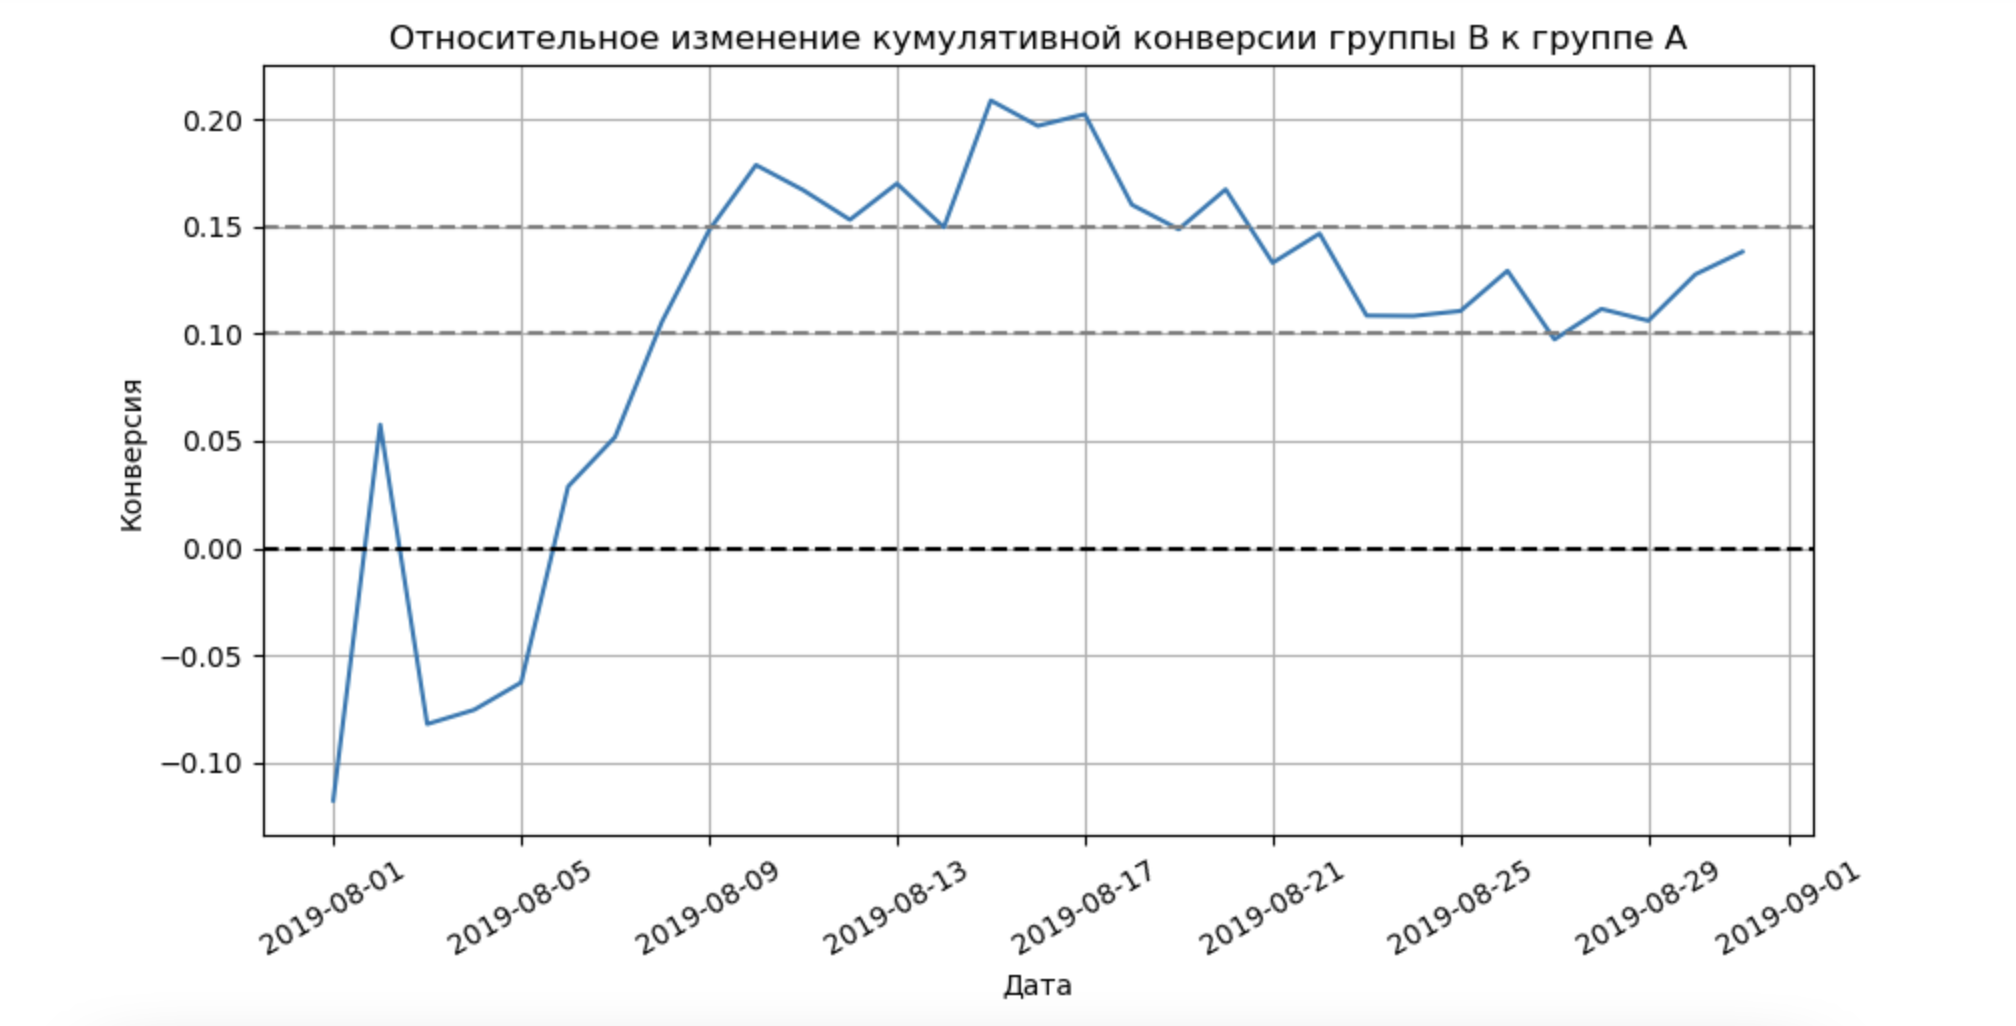

- График различия среднего чека показывает, что для группы B во второй половине теста упали крупные заказы, поэтому нужно больше данных, чтобы прийти к ее реальному среднему чеку.Но очищенные данные показали, что абсолютные значения средних чеков практически одинаковые 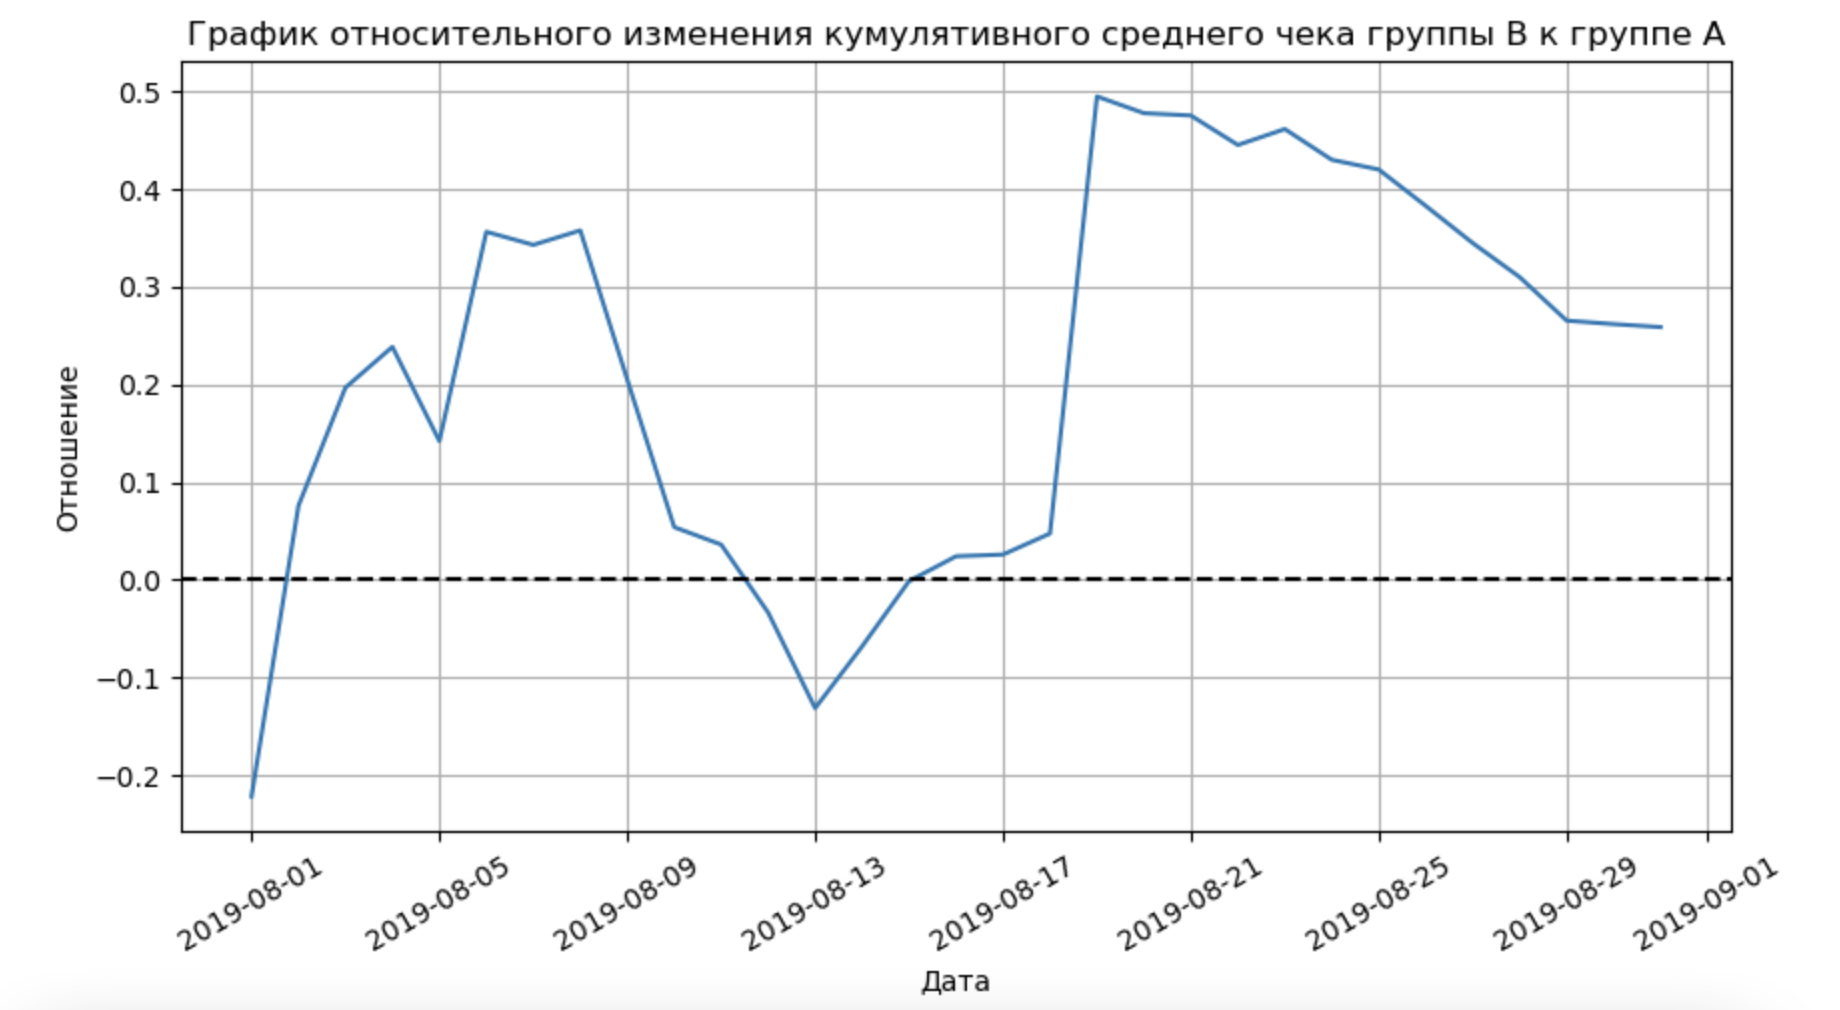



**Вывод: Исходя из обнаруженных фактов, тест следует остановить, признать его успешным и перейти к проверке следующей гипотезы**

### Общий вывод

Я проанализировала гипотезы, продоставленные отделом маркетинга для увеличения выручки

**Гипотеза №7: 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'**, ,была выбрана приоритеной, так как имеет наивысшую оценку и у компании есть все необходимые ресурсы для проведения A/B теста

**По результатам A/B теста**:

- Есть стат.значимое различие по среднему количеству заказов на посетителя между группами как для "сырых", так и для "очищенных" данных

- Нет стат.значимого различия по среднему чеку между группами как для "сырых", так и для "очищенных" данных

- Различие среднего количества заказов (конверсии) между группами сообщает, что результаты группы В стабильно лучше,чем группы А и есть тенденции к росту. Показатель конверсии группы В первысил 20%, стабилизировавшись в пределах от 10 до 15 % к концу периода

- Различие в сумме среднего чека показывает, что для группы B во второй половине теста упали крупные заказы, поэтому нужно больше данных, чтобы прийти к ее реальному среднему чеку.Но очищенные данные показали, что абсолютные значения средних чеков для группы А и B практически одинаковые